[Kaggle Dataset Link](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing tables

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credit = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies.head(1).shape  #(1, 20)
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [4]:
for i in ['status','vote_average','original_language']:
    print(movies[i].unique())

['Released' 'Post Production' 'Rumored']
[ 7.2  6.9  6.3  7.6  6.1  5.9  7.4  7.3  5.7  5.4  7.   6.5  6.4  6.2
  7.1  5.8  6.6  7.5  5.5  6.7  6.8  6.   5.1  7.8  5.6  5.2  8.2  7.7
  5.3  8.   4.8  4.9  7.9  8.1  4.7  5.   4.2  4.4  4.1  3.7  3.6  3.
  3.9  4.3  4.5  3.4  4.6  8.3  3.5  4.   2.3  3.2  0.   3.8  2.9  8.5
  1.9  3.1  3.3  2.2  0.5  9.3  8.4  2.7 10.   1.   2.   2.8  9.5  2.6
  2.4]
['en' 'ja' 'fr' 'zh' 'es' 'de' 'hi' 'ru' 'ko' 'te' 'cn' 'it' 'nl' 'ta'
 'sv' 'th' 'da' 'xx' 'hu' 'cs' 'pt' 'is' 'tr' 'nb' 'af' 'pl' 'he' 'ar'
 'vi' 'ky' 'id' 'ro' 'fa' 'no' 'sl' 'ps' 'el']


In [5]:
credit.head(1).shape  #(1,4)
credit.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


## Merging tables

In [6]:
# merge the table on basis of 'title' column
merge1 = movies.merge(credit, on='title')
merge1.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [7]:
merge1.shape

(4809, 23)

In [8]:
merge1.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000,4809.000000
mean,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,6.092514,690.331670,57120.571429
std,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,1.193989,1234.187111,88653.369849
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,5.600000,54.000000,9012.000000
50%,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14624.000000
75%,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,6.800000,737.000000,58595.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


In [9]:
merge1.isna().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

## Analysing Data

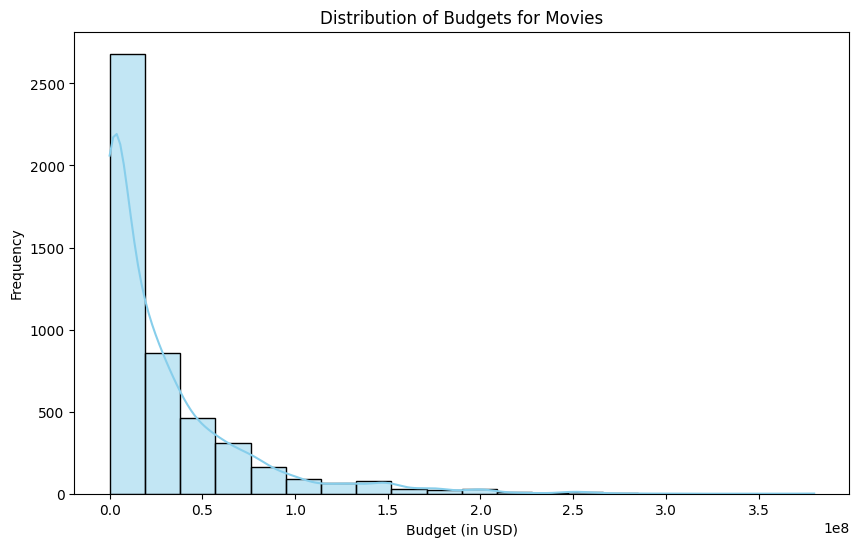

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(merge1['budget'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Budgets for Movies')
plt.xlabel('Budget (in USD)')
plt.ylabel('Frequency')
plt.show()

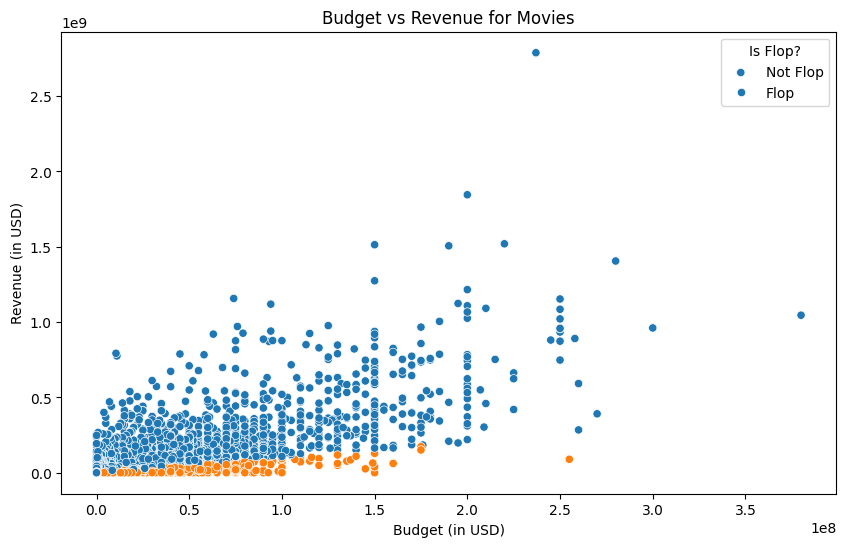

In [11]:
merge1['is_flop'] = merge1['revenue'] < merge1['budget']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merge1, x='budget', y='revenue', hue='is_flop')
plt.title('Budget vs Revenue for Movies')
plt.xlabel('Budget (in USD)')
plt.ylabel('Revenue (in USD)')
plt.legend(title='Is Flop?', labels=['Not Flop', 'Flop'])
plt.show()

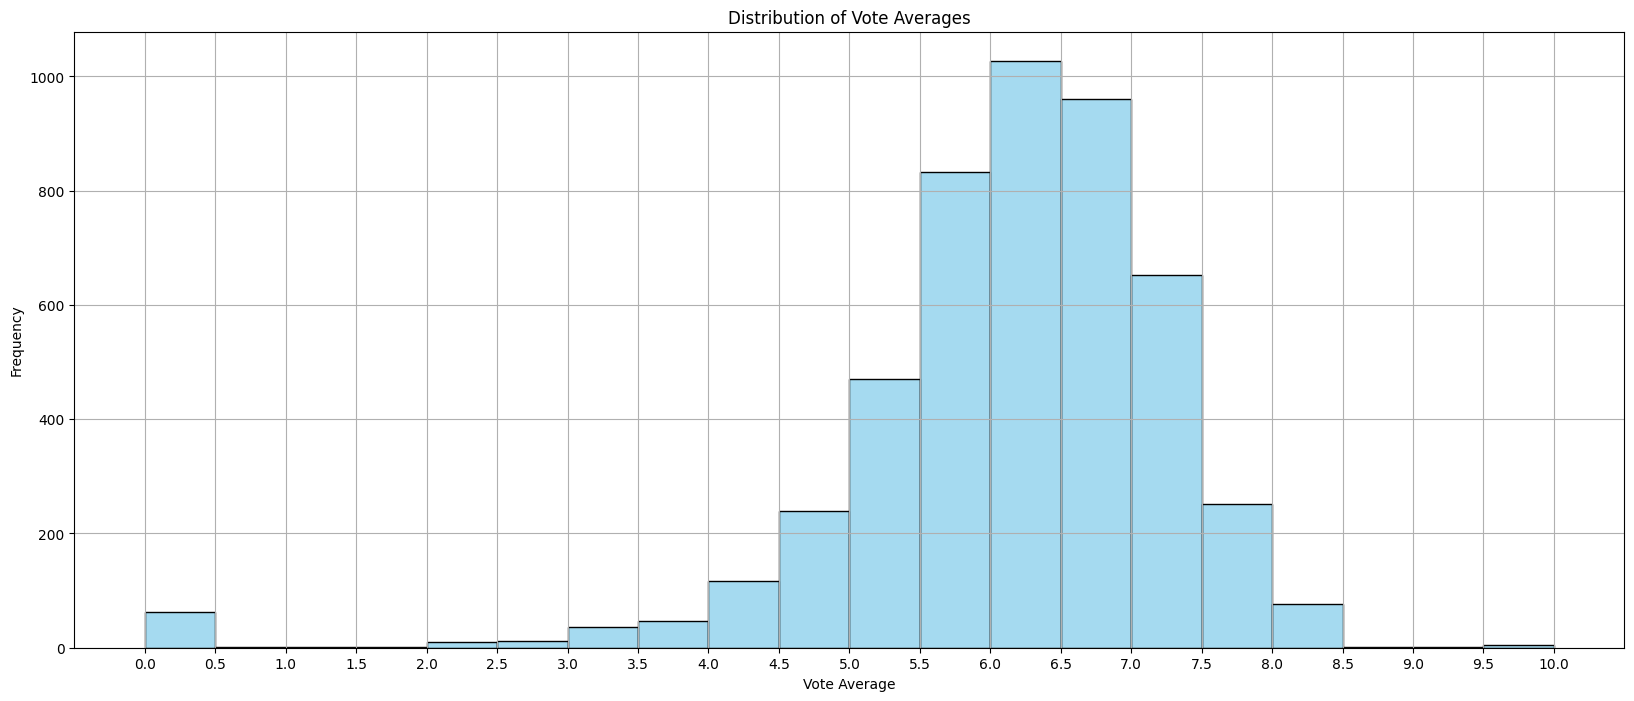

In [12]:
plt.figure(figsize=(20, 8))
sns.histplot(data=merge1, x='vote_average', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.xticks(np.arange(0,10.5,0.5))
plt.grid(True)
plt.show()

## Data Cleaning

Things we needed on our Dataset

In [13]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [14]:
dataset = merge1[['movie_id','title','overview','genres','keywords','cast','crew']]
dataset.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


checking for null values

In [15]:
dataset.isnull().sum() # dataset had 3 null values
# to remove null we use dropna function
# it removes the row with null values in it
dataset.dropna(inplace=True)

C:\Users\aariz\AppData\Local\Temp\ipykernel_17464\4011723725.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(inplace=True)


check for duplicate data

In [16]:
dataset.duplicated().sum()

0

converting row values to a readable format

In [ ]:
dataset.iloc[0]['genres']   

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [18]:
# [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]
# ['Action','Adventure','Fantasy','SciFi']

In [19]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [20]:
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):        # i = {"id": 28, "name": "Action"}
        L.append(i['name'])                 # i['name'] = 'Action'
    return L

In [21]:
dataset['genres'].apply(convert)

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4806, dtype: object

In [22]:
dataset['genres'] = dataset['genres'].apply(convert)
dataset.head()

C:\Users\aariz\AppData\Local\Temp\ipykernel_17464\2252160959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['genres'] = dataset['genres'].apply(convert)


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


similarly for all the columns

In [23]:
dataset['keywords'] = dataset['keywords'].apply(convert)
dataset.head()

C:\Users\aariz\AppData\Local\Temp\ipykernel_17464\1151194560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['keywords'] = dataset['keywords'].apply(convert)


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [24]:
# for gotting only first 3 values for cast
def convert3(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

In [25]:
dataset['cast'] = dataset['cast'].apply(convert3)
dataset.head()

C:\Users\aariz\AppData\Local\Temp\ipykernel_17464\2156099382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cast'] = dataset['cast'].apply(convert3)


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [26]:
dataset['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [27]:
# to get only director
def getdirector(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [28]:
dataset['crew'].apply(getdirector)

0           [James Cameron]
1          [Gore Verbinski]
2              [Sam Mendes]
3       [Christopher Nolan]
4          [Andrew Stanton]
               ...         
4804     [Robert Rodriguez]
4805         [Edward Burns]
4806          [Scott Smith]
4807          [Daniel Hsia]
4808     [Brian Herzlinger]
Name: crew, Length: 4806, dtype: object

In [29]:
dataset['crew'] = dataset['crew'].apply(getdirector)
dataset.head()

C:\Users\aariz\AppData\Local\Temp\ipykernel_17464\970953040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['crew'] = dataset['crew'].apply(getdirector)


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


converting non-list column values to list

In [30]:
dataset['overview']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4804    El Mariachi just wants to play his guitar and ...
4805    A newlywed couple's honeymoon is upended by th...
4806    "Signed, Sealed, Delivered" introduces a dedic...
4807    When ambitious New York attorney Sam is sent t...
4808    Ever since the second grade when he first saw ...
Name: overview, Length: 4806, dtype: object

In [31]:
dataset['overview'] = dataset['overview'].apply(lambda x:x.split())
dataset.head()


C:\Users\aariz\AppData\Local\Temp\ipykernel_17464\2531905282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['overview'] = dataset['overview'].apply(lambda x:x.split())


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [32]:
dataset['genres'] = dataset['genres'].apply(lambda x:[i.replace(' ','') for i in x])
dataset['keywords'] = dataset['keywords'].apply(lambda x:[i.replace(' ','') for i in x])
dataset['cast'] = dataset['cast'].apply(lambda x:[i.replace(' ','') for i in x])
dataset['crew'] = dataset['crew'].apply(lambda x:[i.replace(' ','') for i in x])

C:\Users\aariz\AppData\Local\Temp\ipykernel_17464\609448954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['genres'] = dataset['genres'].apply(lambda x:[i.replace(' ','') for i in x])
C:\Users\aariz\AppData\Local\Temp\ipykernel_17464\609448954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['keywords'] = dataset['keywords'].apply(lambda x:[i.replace(' ','') for i in x])
C:\Users\aariz\AppData\Local\Temp\ipykernel_17464\609448954.py:3: SettingWithCopyWarning: 
A value is trying to be

In [33]:
dataset.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


### Creating 'tags' Column

In [34]:
dataset['tags'] = dataset['overview'] + dataset['genres'] + dataset['keywords'] + dataset['cast'] + dataset['crew']
dataset.head()

C:\Users\aariz\AppData\Local\Temp\ipykernel_17464\1456306247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['tags'] = dataset['overview'] + dataset['genres'] + dataset['keywords'] + dataset['cast'] + dataset['crew']


,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


building dataframe

In [35]:
new_df = dataset[['movie_id','title','tags']]
new_df

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


In [36]:
new_df['tags'] = new_df['tags'].apply(lambda x:' '.join(x))
new_df.head()

C:\Users\aariz\AppData\Local\Temp\ipykernel_17464\2896780762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:' '.join(x))


,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [37]:
new_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

making all to lower case

In [38]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())
new_df.head()

C:\Users\aariz\AppData\Local\Temp\ipykernel_17464\842480936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [39]:
new_df.dtypes

movie_id     int64
title       object
tags        object
dtype: object

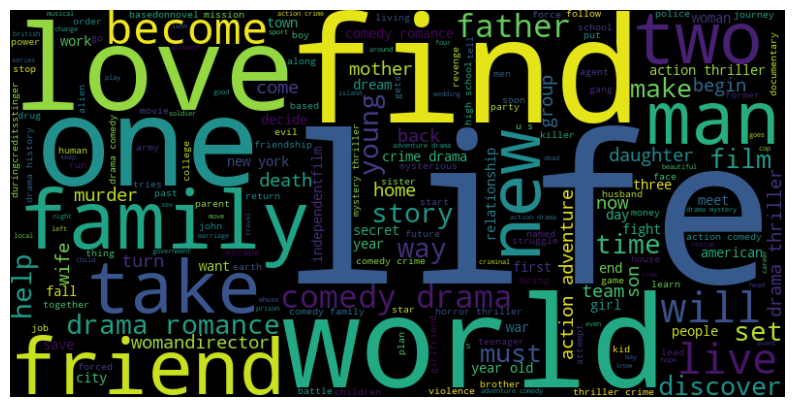

In [40]:
from wordcloud import WordCloud

tags_text = ' '.join(new_df['tags'].astype(str))

wordcloud = WordCloud(width=800, height=400).generate(tags_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Vectorizing Data for NLP

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer = CountVectorizer(max_features=5000, stop_words='english')

In [42]:
vectors = Vectorizer.fit_transform(new_df['tags']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
Vectorizer.get_feature_names_out() # you get corpes
# corpes - words or tags for recommenders

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [45]:
def stem(text):
    y=[]
    for i in text.split():
# ps.stem('loved') = 'love'
        y.append(ps.stem(i))
    return ' '.join(y)

applying stem function to new_df  'tags'

In [46]:
new_df['tags'] = new_df['tags'].apply(stem)


C:\Users\aariz\AppData\Local\Temp\ipykernel_17464\1132361295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


## Finding Cosine Similarity

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

In [48]:
cosine_similarity(vectors)

array([[1.        , 0.08964215, 0.05976143, ..., 0.02519763, 0.02817181,
        0.        ],
       [0.08964215, 1.        , 0.0625    , ..., 0.02635231, 0.        ,
        0.        ],
       [0.05976143, 0.0625    , 1.        , ..., 0.02635231, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02635231, ..., 1.        , 0.0745356 ,
        0.04836508],
       [0.02817181, 0.        , 0.        , ..., 0.0745356 , 1.        ,
        0.05407381],
       [0.        , 0.        , 0.        , ..., 0.04836508, 0.05407381,
        1.        ]])

In [49]:
similarity = cosine_similarity(vectors)
# 4806, 4806 means 
# the above array shows the similarity of each movie with each movies

In [50]:
similarity[0]
# this array shows the 0th index movie's similarity with other all movies
# that is why the similarity with itself is '1' (0th index of array)
# greater the number = more similar


array([1.        , 0.08964215, 0.05976143, ..., 0.02519763, 0.02817181,
       0.        ])

In [51]:
similarity[1]

array([0.08964215, 1.        , 0.0625    , ..., 0.02635231, 0.        ,
       0.        ])

we need our model to recommend only 5 similar movies from our selection

In [52]:
new_df[new_df['title'] == 'Avatar'].index[0] #0
new_df[new_df['title'] == 'Inception'].index[0] #96
# this is how we can fetch movie index

96

In [53]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])
# This gives the descending order of similar movies using vector numbers

[(0, 1.0),
 (539, 0.26089696604360174),
 (1194, 0.2581988897471611),
 (507, 0.25302403842552984),
 (260, 0.25110592822973776),
 (1216, 0.24944382578492943),
 (582, 0.24397501823713333),
 (1920, 0.243599382882345),
 (3730, 0.23904572186687872),
 (1444, 0.2344036154692477),
 (74, 0.22677868380553634),
 (3608, 0.2238868314198225),
 (322, 0.22230800575069137),
 (83, 0.22190115272469205),
 (61, 0.22131333406899523),
 (1204, 0.2193633988428327),
 (2333, 0.2173253797873328),
 (2409, 0.21653278478430665),
 (47, 0.2164218276749025),
 (495, 0.2162249910469341),
 (4192, 0.2162249910469341),
 (972, 0.21602468994692864),
 (1537, 0.21602468994692864),
 (942, 0.21251185925162067),
 (466, 0.2114722130550724),
 (1329, 0.21147221305507238),
 (2971, 0.21096325392232296),
 (2204, 0.2059714602177749),
 (973, 0.20291986247835692),
 (1201, 0.202837021134844),
 (151, 0.19920476822239894),
 (1275, 0.19889806323953876),
 (4048, 0.1980534816610477),
 (2999, 0.19518001458970666),
 (4405, 0.19518001458970666),
 (3

## A Function to display the 'title' by sorting the cosine similarity

In [54]:
import difflib

def recommend(movie):
    try:
        movie_lower_stripped = movie.lower().strip()
        
        matches = difflib.get_close_matches(movie_lower_stripped, new_df['title'].apply(lambda x: x.lower().strip()))
        
        if matches:
            movie_index = new_df[new_df['title'].apply(lambda x: x.lower().strip()) == matches[0]].index[0]
            
            distances = similarity[movie_index]
            movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[0:6]
            print("{:<50} {:}".format('Movies (Best Matches)','Similarity (%)'))
            print('-'*64)
            for i in movies_list:
                # print(new_df.iloc[i[0]]['title'],distances[i[0]])
                print("{:<50} {:.2f}".format(new_df.iloc[i[0]]['title'], distances[i[0]]*100))
        else:
            print("No similar movie found.")
    except IndexError:
        print("Movie not found in the dataset.")


In [55]:
recommend('spider man')

Movies (Best Matches)                              Similarity (%)
----------------------------------------------------------------
Spider-Man                                         100.00
Spider-Man 3                                       44.81
Spider-Man 2                                       40.41
The Amazing Spider-Man 2                           29.77
The Amazing Spider-Man                             27.53
Arachnophobia                                      24.12


In [56]:
recommend('avatar')

Movies (Best Matches)                              Similarity (%)
----------------------------------------------------------------
Avatar                                             100.00
Titan A.E.                                         26.09
Small Soldiers                                     25.82
Independence Day                                   25.30
Ender's Game                                       25.11
Aliens vs Predator: Requiem                        24.94


In [57]:
recommend('iron man')

Movies (Best Matches)                              Similarity (%)
----------------------------------------------------------------
Iron Man                                           100.00
Iron Man 2                                         46.85
Iron Man 3                                         42.34
Avengers: Age of Ultron                            38.76
Captain America: Civil War                         30.43
The Avengers                                       29.20


In [58]:
recommend('fast and fur')

Movies (Best Matches)                              Similarity (%)
----------------------------------------------------------------
The Fast and the Furious                           100.00
2 Fast 2 Furious                                   31.48
Fast Five                                          29.20
Stone Cold                                         29.20
Point Break                                        29.04
Need for Speed                                     25.67


In [59]:
recommend('interstellar')

Movies (Best Matches)                              Similarity (%)
----------------------------------------------------------------
Interstellar                                       100.00
Silent Running                                     23.61
Space Pirate Captain Harlock                       22.84
The Martian                                        22.48
Apollo 13                                          21.98
Moonraker                                          21.54


In [ ]:
recommend('karate kid')

Movies (Best Matches)                              Similarity (%)
----------------------------------------------------------------
The Karate Kid                                     100.00
Harrison Montgomery                                33.97
Absentia                                           19.99
Mrs. Doubtfire                                     17.72
The Fifth Estate                                   16.01
Here Comes the Boom                                14.32


In [61]:
recommend('kill bill')

Movies (Best Matches)                              Similarity (%)
----------------------------------------------------------------
Kill Bill: Vol. 2                                  100.00
Exiled                                             27.08
Kill Bill: Vol. 1                                  26.57
Point Blank                                        24.72
Crank                                              22.58
Oldboy                                             22.00


In [62]:
recommend('planet apes')

Movies (Best Matches)                              Similarity (%)
----------------------------------------------------------------
Planet of the Apes                                 100.00
Battle for the Planet of the Apes                  30.19
Congo                                              28.02
Conquest of the Planet of the Apes                 26.01
Beneath the Planet of the Apes                     25.18
Escape from the Planet of the Apes                 24.49


In [63]:
recommend('kung fu')

Movies (Best Matches)                              Similarity (%)
----------------------------------------------------------------
Kung Fu Panda                                      100.00
Kung Fu Panda 2                                    36.80
Kung Fu Panda 3                                    28.83
Legend of a Rabbit                                 27.49
Aladdin                                            20.45
Kung Fu Hustle                                     20.03


In [64]:
# similarity[0]

In [65]:
# sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])

In [66]:
# for i in sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1]):
#     #print(i[0]) # gives index
#     #print(new_df.iloc[i[0]]) # gives all the details of the movies
#     print(new_df.iloc[i[0]]['title'])  # gives only title from all the info

In [67]:
import pickle
pickle.dump(new_df, open('movies.pkl','wb'))

In [68]:
new_df.to_dict()

{'movie_id': {0: 19995,
  1: 285,
  2: 206647,
  3: 49026,
  4: 49529,
  5: 559,
  6: 38757,
  7: 99861,
  8: 767,
  9: 209112,
  10: 1452,
  11: 10764,
  12: 58,
  13: 57201,
  14: 49521,
  15: 2454,
  16: 24428,
  17: 1865,
  18: 41154,
  19: 122917,
  20: 1930,
  21: 20662,
  22: 57158,
  23: 2268,
  24: 254,
  25: 597,
  26: 271110,
  27: 44833,
  28: 135397,
  29: 37724,
  30: 558,
  31: 68721,
  32: 12155,
  33: 36668,
  34: 62211,
  35: 8373,
  36: 91314,
  37: 68728,
  38: 102382,
  39: 20526,
  40: 49013,
  41: 44912,
  42: 10193,
  43: 534,
  44: 168259,
  45: 72190,
  46: 127585,
  47: 54138,
  48: 81005,
  49: 64682,
  50: 9543,
  51: 68726,
  52: 38356,
  53: 217,
  54: 105864,
  55: 62177,
  56: 188927,
  57: 10681,
  58: 5174,
  59: 14161,
  60: 17979,
  61: 76757,
  62: 258489,
  63: 411,
  64: 246655,
  65: 155,
  66: 14160,
  67: 15512,
  68: 1726,
  69: 44826,
  70: 8487,
  71: 1735,
  72: 297761,
  73: 2698,
  74: 137113,
  75: 9804,
  76: 14869,
  77: 150540,
  78:

In [69]:
pickle.dump(new_df.to_dict(), open('movie_dict.pkl','wb'))

In [70]:
pickle.dump(similarity, open('similarity.pkl','wb'))

In [6]:

def fetch_poster(movie_id):
    response = requests.get(
        f'https://api.themoviedb.org/3/movie/{movie_id}?api_key=b01bd59ed8c0ce9ced4c8d2a2b3ee396&language=en-US'
    )
    data = response.json()
    
    # Check if 'poster_path' exists
    if "poster_path" in data and data["poster_path"]:
        return "https://image.tmdb.org/t/p/w500/" + data["poster_path"]
    else:
        # Return a placeholder image or handle missing poster scenario
        return "https://via.placeholder.com/500x750?text=No+Image+Available"

In [7]:
print(fetch_poster(550))  # Movie ID for Fight Club


https://image.tmdb.org/t/p/w500//pB8BM7pdSp6B6Ih7QZ4DrQ3PmJK.jpg
